In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import time

In [2]:
print(tf.version)
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

<module 'tensorflow._api.v1.version' from 'D:\\Users\\M PRAVEEN\\anaconda3\\envs\\juptenflowgpu115\\lib\\site-packages\\tensorflow_core\\_api\\v1\\version\\__init__.py'>
True
True


tf.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)


In [3]:
np.random.seed(101) 
tf.set_random_seed(101) 

In [4]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

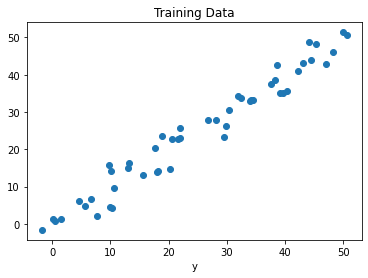

In [5]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

# Eager execution workspace

# Initialize Tensorflow

In [6]:
X = tf.placeholder(tf.float32) 
Y = tf.placeholder(tf.float32) 

In [7]:
W = tf.Variable(np.random.randn(), name = "W", dtype=tf.float32) 
b = tf.Variable(np.random.randn(), name = "b", dtype=tf.float32) 

In [8]:
learning_rate = 0.01
training_epochs = 1000

In [9]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

In [10]:
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

## GradientDescent Optimizer

In [11]:
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost, var_list=[W, b])

# Global Variables Initializer 
init = tf.global_variables_initializer() 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : x}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 0.62494874 W = 0.9951241 b = 1.2381054
Epoch 100 : cost = 0.5456658 W = 0.99812365 b = 1.0914398
Epoch 150 : cost = 0.48087728 W = 1.0008028 b = 0.96044314
Epoch 200 : cost = 0.42781496 W = 1.0031956 b = 0.8434396
Epoch 250 : cost = 0.3842523 W = 1.0053328 b = 0.7389357
Epoch 300 : cost = 0.3484033 W = 1.007242 b = 0.6455922
Epoch 350 : cost = 0.3188218 W = 1.008947 b = 0.56222
Epoch 400 : cost = 0.2943482 W = 1.01047 b = 0.48775345
Epoch 450 : cost = 0.27403834 W = 1.0118302 b = 0.42124167
Epoch 500 : cost = 0.25713938 W = 1.0130452 b = 0.36183488
Epoch 550 : cost = 0.24303497 W = 1.0141305 b = 0.30877414
Epoch 600 : cost = 0.2312225 W = 1.0150996 b = 0.26138115
Epoch 650 : cost = 0.22130199 W = 1.0159653 b = 0.21905091
Epoch 700 : cost = 0.2129444 W = 1.0167387 b = 0.18124212
Epoch 750 : cost = 0.20587914 W = 1.0174294 b = 0.14747244
Epoch 800 : cost = 0.19988586 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 0.19478957 W = 1.0185971 b = 0.090368524
Epoch 900 : cos

## Adam Optimizer

In [13]:
# AdamMinimize = tf.train.AdamOptimizer().minimize(loss=cost)

# # Global Variables Initializer 
# init = tf.global_variables_initializer() 

# with tf.Session() as sess: 

#     # Initializing the Variables 
#     sess.run(init) 

#     start_time = time.time()
#     # Iterating through all the epochs 
#     for epoch in range(training_epochs): 
        
#         # Feeding each data point into the optimizer using Feed Dictionary 
#         for (_x, _y) in zip(x, y): 
#             sess.run(AdamMinimize, feed_dict = {X : _x, Y : _y}) 
#         # sess.run(AdamMinimize, feed_dict = {X : x, Y : y}) 
        
#         # Displaying the result after every 50 epochs 
#         if (epoch + 1) % 50 == 0: 
#             # Calculating the cost a every epoch 
#             c = sess.run(cost, feed_dict = {X : x, Y : y}) 
#             print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
#     elapsed = time.time() - start_time
#     print("time: %f", elapsed)
#     # Storing necessary values to be used outside the Session 
#     training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
#     weight = sess.run(W) 
#     bias = sess.run(b) 

# Plotting

In [14]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561663 



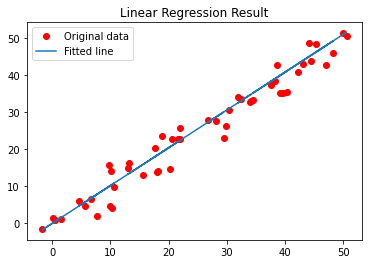

In [15]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
